In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('../data storage/prm_data_L8_CNN.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-0.0250, -0.1382,  0.3641],
                        [-0.1881,  0.4116,  0.1386],
                        [-0.1644,  0.2658, -0.0394]]],
              
              
                      [[[ 0.1246,  0.4332,  0.2458],
                        [ 0.2800, -0.0732,  0.4312],
                        [ 0.3642,  0.3329, -0.2379]]],
              
              
                      [[[-0.3404, -0.1302,  0.0206],
                        [-0.2823, -0.3160, -0.1490],
                        [ 0.2698,  0.0394,  0.0372]]],
              
              
                      [[[-0.2209,  0.0762,  0.1716],
                        [ 0.2848,  0.1355,  0.0198],
                        [-0.0737,  0.3393, -0.2086]]],
              
              
                      [[[ 0.2466, -0.0673, -0.1051],
                        [ 0.0012, -0.3442, -0.1455],
                        [ 0.1066,  0.0068, -0.3663]]]])),
             ('fc.0.weight',
            

In [3]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-0.0250, -0.1382,  0.3641],
          [-0.1881,  0.4116,  0.1386],
          [-0.1644,  0.2658, -0.0394]]],


        [[[ 0.1246,  0.4332,  0.2458],
          [ 0.2800, -0.0732,  0.4312],
          [ 0.3642,  0.3329, -0.2379]]],


        [[[-0.3404, -0.1302,  0.0206],
          [-0.2823, -0.3160, -0.1490],
          [ 0.2698,  0.0394,  0.0372]]],


        [[[-0.2209,  0.0762,  0.1716],
          [ 0.2848,  0.1355,  0.0198],
          [-0.0737,  0.3393, -0.2086]]],


        [[[ 0.2466, -0.0673, -0.1051],
          [ 0.0012, -0.3442, -0.1455],
          [ 0.1066,  0.0068, -0.3663]]]])

In [4]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.cpu().numpy()

横ver

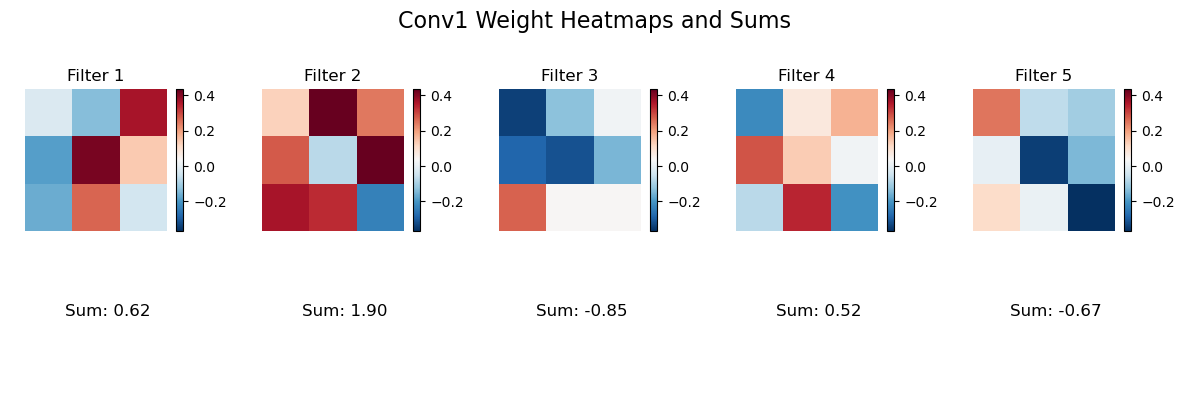

In [18]:
# # 各重みフィルターに対して成分の和を計算
# filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# # カラーマップの最小値を0以下に設定
# min_value = min(np.min(conv1_weight_np), 0)
# # 単一の最大値を取得
# max_value = np.amax(conv1_weight_np)

# # 5つの重みフィルターとその成分の和を1つの図にプロット
# plt.figure(figsize=(12, 4))
# for i in range(5):
#     plt.subplot(2, 5, i+1)
#     plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
#     plt.colorbar()
#     plt.title(f'Filter {i+1}')
#     plt.axis('off')
    
#     plt.subplot(2, 5, i+6)
#     plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
#     plt.axis('off')

# plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# # 図をファイルとして保存
# plt.savefig('../image storage/L8_CNN_filter.png')
# plt.show()


縦ver

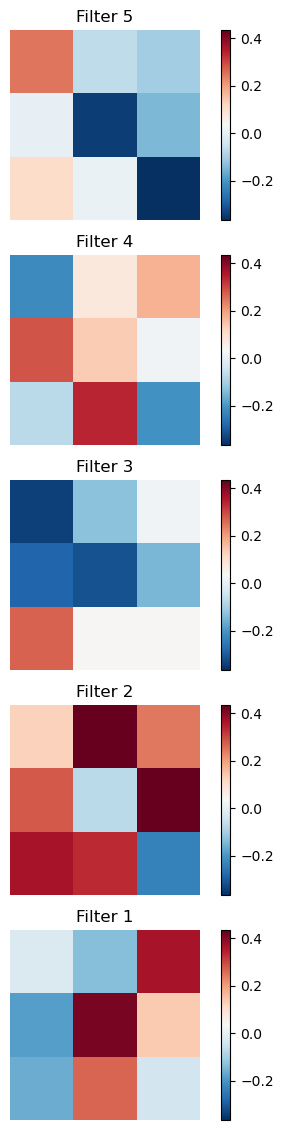

In [22]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# カラーマップの最小値を0以下に設定
min_value = min(np.min(conv1_weight_np), 0)
# 単一の最大値を取得
max_value = np.amax(conv1_weight_np)

# グリッドの行数と列数を設定
num_rows = 5
num_cols = 2

# フィギュアを作成
plt.figure(figsize=(9, 12))

for i in reversed(range(5)):
    # ヒートマップを描画
    plt.subplot(num_rows, num_cols, (4 - i) * num_cols + 1)
    plt.imshow(conv1_weight_np[i, 0], cmap='RdBu_r', vmin=min_value, vmax=max_value, interpolation='nearest')
    plt.colorbar()
    plt.title(f'Filter {i + 1}')
    plt.axis('off')

# plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# 図をファイルとして保存
plt.savefig('../image storage/L16_CNN_filter.png')
plt.show()


In [6]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[-0.0430,  0.0042, -0.0415,  ..., -0.0789, -0.0039,  0.0177],
        [ 0.0140, -0.0482, -0.0672,  ..., -0.0881, -0.0119, -0.0278],
        [-0.0677,  0.1104,  0.1128,  ..., -0.0135, -0.0879, -0.0680],
        ...,
        [-0.2229, -0.1141, -0.1130,  ...,  0.0398,  0.0179, -0.0414],
        [-0.2206, -0.2674, -0.1159,  ..., -0.0704,  0.0991,  0.0531],
        [-0.0599, -0.2280, -0.0425,  ..., -0.0757,  0.0207, -0.0173]])

In [7]:
fc_weight.size()

torch.Size([100, 80])

In [8]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [9]:
fc_weight_np_square

array([[-0.04297945,  0.01395681, -0.06770255, ..., -0.22291562,
        -0.22059685, -0.05988199],
       [ 0.00416196, -0.04822877,  0.11036075, ..., -0.11407675,
        -0.26744968, -0.22804357],
       [-0.04151396, -0.0671782 ,  0.11277068, ..., -0.11295146,
        -0.115886  , -0.04247769],
       ...,
       [-0.07890684, -0.08814974, -0.01348559, ...,  0.03980965,
        -0.0703724 , -0.07574128],
       [-0.00387694, -0.01185719, -0.08792496, ...,  0.01785967,
         0.09905663,  0.02068583],
       [ 0.01766159, -0.02782447, -0.06802017, ..., -0.04143975,
         0.05308485, -0.01734555]], dtype=float32)

In [10]:
fc_weight_np_square.shape

(80, 100)

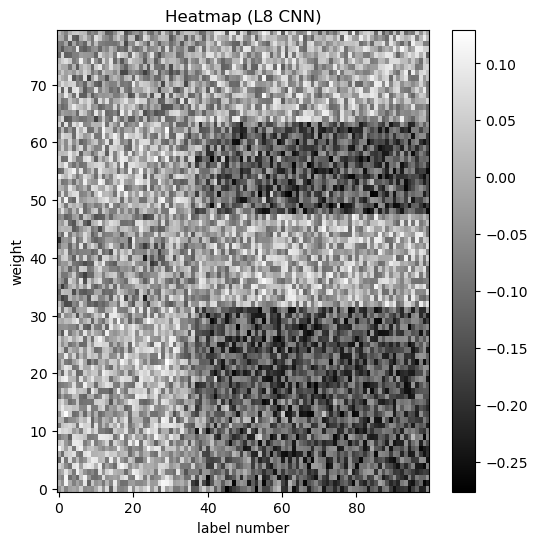

In [23]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L8 CNN)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image storage/L8_CNN_weight.png')
plt.show()

In [12]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([-1.3452575 , -1.2439783 , -0.8663613 , -1.3502506 , -1.7470086 ,
       -1.7302351 , -1.0617504 , -2.035647  , -1.6357647 , -2.1948547 ,
       -1.6794724 , -1.5006655 , -0.33370957, -1.7182052 , -1.7801467 ,
       -1.0337722 , -0.7425216 , -0.46265593, -1.8327001 , -2.3106313 ,
       -0.4961326 , -0.01908302, -0.09957699, -2.7021568 , -0.31862944,
       -1.9109834 , -1.39155   , -1.7241676 , -1.1925766 ,  0.12119403,
       -1.9088445 , -0.73682153, -1.5212926 , -1.9089348 , -3.9323516 ,
       -2.617704  , -3.293088  , -5.8225784 , -3.8295603 , -3.9042444 ,
       -6.799764  , -6.1487036 , -4.362392  , -5.644471  , -5.952695  ,
       -6.108296  , -6.6007257 , -7.145814  , -6.8246536 , -5.7773895 ,
       -5.4093924 , -6.4338465 , -6.215161  , -6.452091  , -6.6507106 ,
       -6.486763  , -6.489094  , -7.526227  , -6.773004  , -6.5816317 ,
       -6.8242474 , -6.0532165 , -6.3873005 , -7.1751013 , -6.7429867 ,
       -6.332492  , -7.664402  , -7.4403925 , -7.169117  , -7.09

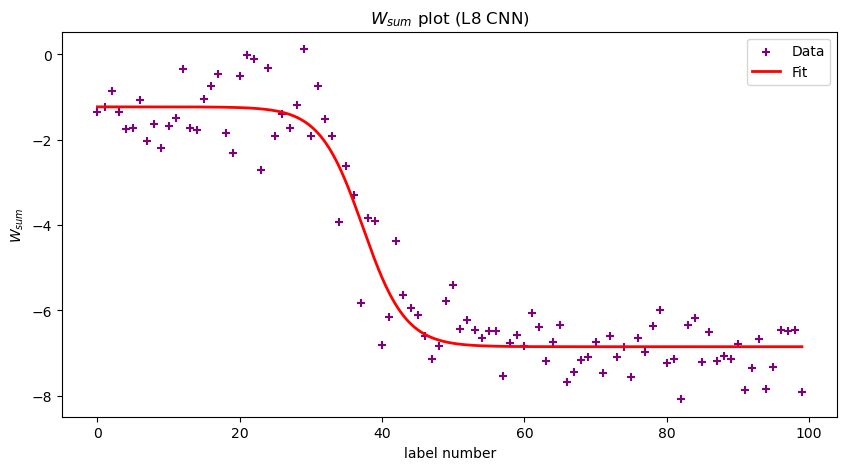

Fitted Parameters:
a: -2.8100103920310833
b: 0.16661950581156496
c: -6.211565352680082
d: -4.03889799143943


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L8 CNN)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
plt.savefig('../image storage/L8_CNN_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [14]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 37.27994103946587
beta: 0.5012520488037653
